#SVM (support vector machines)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pickle

from svm_ import find_support,plot_svm,plot_boundary

%matplotlib inline

In [14]:
with open('svm_data.pkl','r') as f:
    x,y = pickle.load(f)
with open('svm_labels.pkl','r') as f:
    labels = pickle.load(f)
    
c1 = '#FF6DB6'
c2 = '#006DDB'
students = [
    'Anna Wolak',
    'Anna Novakovska',
    'Bing Liang',
    'Carlos Gallardo',
    'Erin Wolpert',
    'Evan Li',
    'Jane Huston',
    'Jerry Tsai',
    'Keita Broadwater',
    'Kerry Levenberg',
    'Matthew Bohan',
    'Miles Monaghan',
    'Minoo Beyzavi',
    'Moses Marsh',
    'Neal Riordan',
    'Omid Saremi',
    'Robert Senseman',
    'Sami Rubenfeld',
    'Simon Petre',
    'Somaye Yari',
    'Srinivas Moparthy',
    'Sunakshi Bhatia',
    'Thomas Dobbs',
]
def random_student():
    return np.random.choice(students)

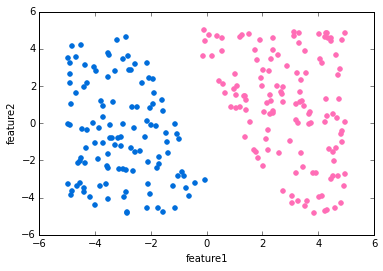

In [15]:
plt.scatter(x[labels==1],y[labels==1],color=c1,edgecolor=c1)
plt.scatter(x[labels==-1],y[labels==-1],color=c2,edgecolor=c2)
plt.xlabel('feature1')
plt.ylabel('feature2')
pass

##how can we classify this data?

In [16]:
random_student()

'Somaye Yari'

In [17]:
random_student()

'Jerry Tsai'

In [18]:
random_student()

'Jerry Tsai'

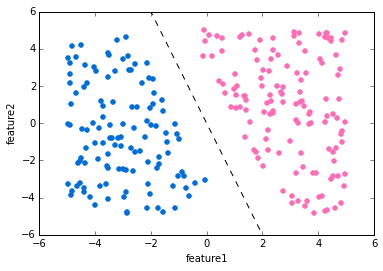

In [19]:
v = np.linspace(-5,5)
plt.scatter(x[labels==1],y[labels==1],color=c1,edgecolor=c1)
plt.scatter(x[labels==-1],y[labels==-1],color=c2,edgecolor=c2)
plt.xlabel('feature1')
plt.ylabel('feature2')

plt.plot(v,-3*v,'k--')
plt.xlim(-6,6)
plt.ylim(-6,6)
pass

##we want the line that divides negative from positive

###could get that line from logistic regression

#${{1}\over{1+e^{-(\beta_0 + \beta_1 * x_1 + \beta_2 * x_2)}}} = t$
#$ e^{-(\beta_0 + \beta_1 * x_1 + \beta_2 * x_2)} = 1/t - 1 $
#$ \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 = ln(1/t-1) $
#$ x_2 => y, x_1 => x$
#$ y = {ln(1/t-1)\over{\beta_2}}-({{\beta_1}\over{\beta_2}}x + {{\beta_0}\over{\beta_2}})$

In [3]:
def plot_decision(X,y,threshold=0.5,line_color='k'):
    colors = [c1 if i == 1 else c2 for i in y]
    m = LogisticRegression().fit(X,y)
    mod = np.log(1./threshold - 1)/m.coef_[0][1]
    slope = -1.*m.coef_[0][0]/m.coef_[0][1]
    intercept = -1.*m.intercept_[0]/m.coef_[0][1] + mod
    v = np.linspace(-5,5,100)
    plt.scatter(X[:,0],X[:,1],color=colors,edgecolor=colors)
    plt.plot(v,slope*v+intercept,color=line_color)
    plt.xlabel('feature1')
    plt.ylabel('feature2')

    plt.ylim(-6,6)
    plt.xlim(-6,6)
    
    return slope,intercept

(-3.3145320685854536, -0.1074338242606209)

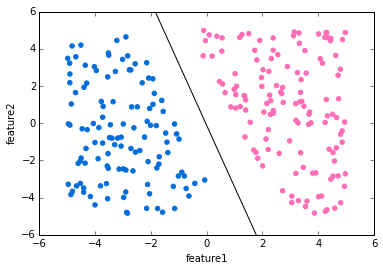

In [20]:
X = np.array([x,y]).T
plot_decision(X,labels)

(-3.3145320685854536, 1.7636456850420497)

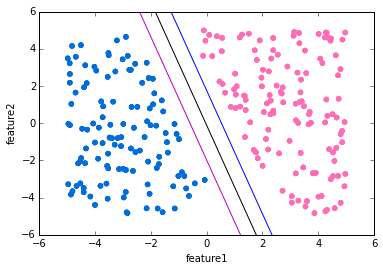

In [21]:
plot_decision(X,labels)
plot_decision(X,labels,0.8,'m')
plot_decision(X,labels,0.2,'b')

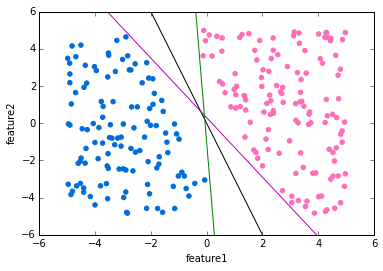

In [22]:
colors = [c1 if i == 1 else c2 for i in labels]
plt.scatter(X[:,0],X[:,1],color=colors,edgecolor=colors)
plt.plot(v,-3.*v,'k')
plt.plot(v,-18*v-1,'g')
plt.plot(v,-1.6*v + 0.3,'m')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.ylim(-6,6)
pass

In [25]:
random_student()

'Kerry Levenberg'

In fact there are an infinite number of lines that we could use

##what conditions might we want to impose on the line?

In [26]:
def make_plot(X,colors):
    plt.scatter(X[:,0],X[:,1],color=colors)

    plt.plot(v,-3*v-3.08,'k')
    plt.plot(v,-3*v + 3.08,'k')
    plt.plot(v,-3*v,'k--')

    plt.xlabel('feature1')
    plt.ylabel('feature2')

    plt.ylim(-6,6)
    pass


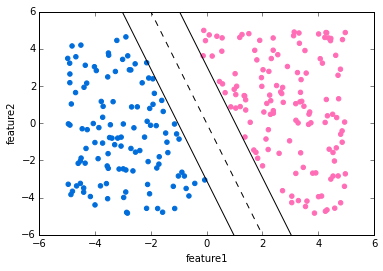

In [27]:
make_plot(X,colors)

##how can we turn this idea into math?

for a plane through the origin, with normal vector $\vec{w}$, and an unknown point $\vec{u}$:  
if $\vec{w} \cdot \vec{u} > 0$ then point is on right side of plane  
if the plane is not through the origin, then there exists a b:  
if $\vec{w} \cdot \vec{u} + b> 0$ then the point is on the right side of plane

introduce notation for positive and negative:  
$y_i = 1 \iff y_i \text{ is a positive example}$  
$y_i = -1 \iff y_i \text{ is a negative example}$

then:  
$y_i * (\vec{w} \cdot \vec{u} + b) \ge 0$

but what about the margin?

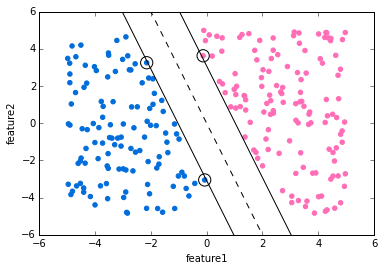

In [28]:
support,s_labels = find_support(X,-3,0)
make_plot(X,colors)
plt.scatter(support[:,0],support[:,1],color='none',s=150,edgecolor='k')
pass

we can assert we want:   
$y_i * (\vec{w} \cdot \vec{x} + b) \ge 1$  
where $\vec{x}$ is the set of points in our data set

and:  
$y_i * (\vec{w} \cdot \vec{x}_i + b) = 1 \text{ for } \vec{x}_i \text{ on the margin}$  
on the margin is the point, or points, closest to the separating hyperplane  

##what does this mean for finding w (and b)?

##how wide is the margin?

$width = (\vec{x}_+ - \vec{x}_-)$, where $\vec{x}_+,\vec{x}_-$ are support vectors for positive or negative examples

but, this width might be angled across the street

In [30]:
random_student()

'Neal Riordan'

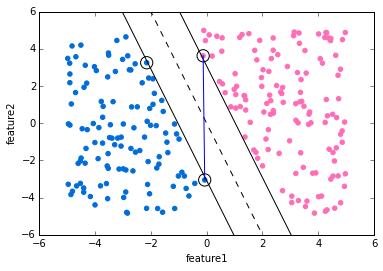

In [29]:
support,s_labels = find_support(X,-3,0)
make_plot(X,colors)
plt.scatter(support[:,0],support[:,1],color='none',s=150,edgecolor='k')
plt.plot([support[0,0],support[1,0]],[support[0,1],support[1,1]])
pass

so, lets define:  
$width_\bot = (\vec{x}_+ - \vec{x}_-) \cdot {\vec{w}\over{||w||}}$

lets try and be a little tricky:  
$y_+ * (\vec{x}_+ \cdot \vec{w} + b) = 1$  
$y_- * (\vec{x}_- \cdot \vec{w} + b) = 1$  
so:  
$\vec{x}_+ \cdot \vec{w} = 1 - b$  
$\vec{x}_- \cdot \vec{w} = -1 - b$  
so:  
$width_\bot = {(1 - b + 1 + b)\over{||w||}}$  
$width_\bot = {2\over{||w||}}$

That is really nice, now to make the biggest street possible we just need to maximize $2/||w||$  
or equivalently:  
minimize $\frac{1}{2}||w||^2$  
subject to $y_i(\vec{w} \cdot \vec{x} + b) \ge 1$  

##how do we maximize/minimize functions with constraints?

In [31]:
random_student()

'Keita Broadwater'

$$\mathscr{L} = \left(\frac{1}{2}\right) ||w||^2 - \sum_{i} \left[\alpha_i (y_i (\vec{w} \cdot \vec{x}_i + b)-1)\right]$$

after some math...

$$\max\limits_{\alpha \ge 0, \sum\limits_i[\alpha_i y_i] = 0} \left (\sum_{i} \alpha_i - \left(\frac{1}{2}\right) \sum_{i,j} \left[\alpha_i \alpha_j  y_i  y_j  (\vec{x}_i \cdot \vec{x}_j) \right]\right )$$  

then, for an unknown point $\vec{u}$ we would check:  
$y_u = sign(\vec{w} \cdot \vec{u} + b)$  
  
we can update our prediction function to:  
$y_u = sign(\sum\limits_i [\alpha_i y_i (\vec{x}_i \cdot \vec{u})] + b)$

to calculate $\vec{w}$ and $b$:  
$ \vec{w} = \sum_\limits{i} [\alpha_i y_i \vec{x}_i] $  
$ b = y_k - \vec{w} \cdot \vec{x}_k \text{ for any } \vec{x}_k \text{ with } \alpha_k \neq 0 $  

The minimization is now a quadratic optimization in $\alpha$  
importantly this, and the decision function, only depend on the dot products of our input data, we will talk more about what that means this afternoon

In [5]:
def plot_svc_decision(svc, show=True):
    # get the separating hyperplane
    w = svc.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (svc.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1. / np.sqrt(np.sum(svc.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k--')
    plt.plot(xx, yy_down, 'k')
    plt.plot(xx, yy_up, 'k')
    
    if show:
        print 'slope of decision boundary: {}'.format(a)
        print 'margin width: {}'.format(2*margin)
#         plt.show()

slope of decision boundary: -3.03124335286
margin width: 2.0374353691


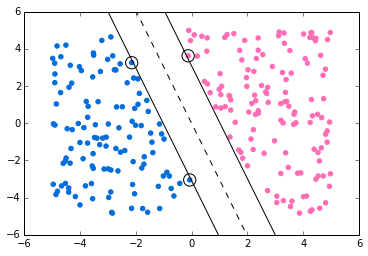

In [32]:
svc = SVC(kernel='linear')
svc.fit(X,labels)

plt.scatter(X[:,0],X[:,1],color=colors)
plot_svc_decision(svc,True)
svc_sp = svc.support_vectors_

plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')

plt.ylim(-6,6)
pass

In [33]:
print svc.support_vectors_
print '-'*28
print X[svc.support_]

[[-0.06832966 -3.05093567]
 [-2.14755115  3.2516902 ]
 [-0.12466102  3.62392409]]
----------------------------
[[-0.06832966 -3.05093567]
 [-2.14755115  3.2516902 ]
 [-0.12466102  3.62392409]]


In [34]:
print svc.coef_[0]
for ind in svc.support_:
    b = labels[ind]-svc.coef_[0].dot(X[ind])
    print b

[ 0.93220879  0.30753347]
0.00196233742785
0.00196247777742
0.00173215035777


In [40]:
random_student()

'Omid Saremi'

slope of decision boundary: -4586.07699699
margin width: 1.56477482332


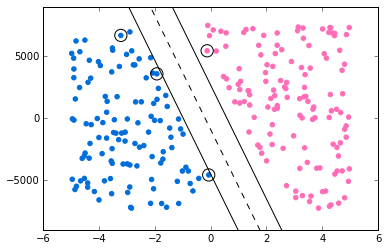

In [41]:
X[:,1] = X[:,1]*1500
svc = SVC(kernel='linear')
svc.fit(X,labels)

plt.scatter(X[:,0],X[:,1],color=colors)
plot_svc_decision(svc,True)
svc_sp = svc.support_vectors_

plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')

plt.ylim(-6*1500,6*1500)
X[:,1] = X[:,1]/1500

In [42]:
print svc.support_vectors_
print svc.coef_[0]
print svc.intercept_

[[ -6.83296554e-02  -4.57640351e+03]
 [ -1.92740548e+00   3.57722018e+03]
 [ -3.21734263e+00   6.67573621e+03]
 [ -1.24661023e-01   5.43588614e+03]]
[  1.27813914e+00   2.78699888e-04]
[ 0.25518239]


##dimensions
###this will come up again later

![dimensions](ryan_dim.png)

#afternoon
##soft margins and kernels

In [6]:
with open('svm_data_insep.pkl','r') as f:
    xi,yi = pickle.load(f)
with open('svm_labels_insep.pkl','r') as f:
    labelsi = pickle.load(f)
colorsi = [c1 if i == 1 else c2 for i in labelsi]

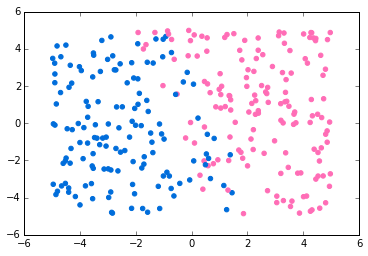

In [43]:
Xi = np.array([xi,yi]).T

plt.scatter(Xi[:,0],Xi[:,1],color=colorsi)
pass

##what now?
###can we use maximum margin for this data?

In [44]:
random_student()

'Sunakshi Bhatia'

In [ ]:
random_student()

In [ ]:
random_student()

In [ ]:
random_student()

instead of looking at $y_i * (\vec{w} \cdot \vec{u} + b) \ge 0$  
we use $y_i * (\vec{w} \cdot \vec{u} + b) \ge 1 - \xi_i$  
$\xi_i$ are called slack variables  
  
they penalize samples that are either within the margin, or even on the wrong side of the boundary  
  
the resulting classifier, a soft-margin svm, now makes trade off between maximizing correct classification and making the widest possible margin 

slope of decision boundary: -3.03220571229
margin width: 2.1192911378
accuracy: 0.91156462585


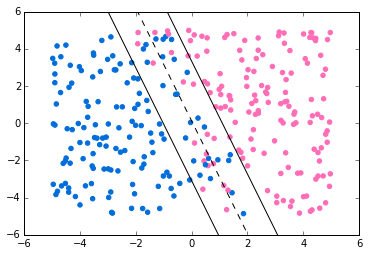

In [45]:
svc2 = SVC(C=1,kernel='linear')
svc2.fit(Xi,labelsi)

plt.scatter(Xi[:,0],Xi[:,1],color=colors)
plot_svc_decision(svc2,True)
# svc_sp = svc2.support_vectors_

# plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')
print 'accuracy: {}'.format(svc2.score(Xi,labelsi))
plt.ylim(-6,6)
pass

In [46]:
random_student()

'Matthew Bohan'

In [47]:
random_student()

'Sunakshi Bhatia'

In [48]:
random_student()

'Anna Wolak'

In [ ]:
random_student()

slope of decision boundary: -4.55698040957
margin width: 6.67282453939
accuracy: 0.91156462585


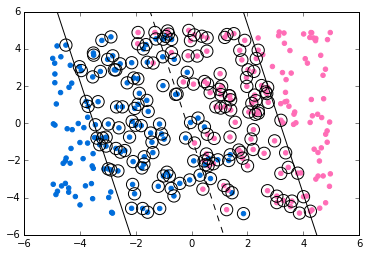

In [62]:
svc2 = SVC(C=0.001,kernel='linear')
svc2.fit(Xi,labelsi)

plt.scatter(Xi[:,0],Xi[:,1],color=colors)
plot_svc_decision(svc2,True)
svc_sp = svc2.support_vectors_

plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')
print 'accuracy: {}'.format(svc2.score(Xi,labelsi))
plt.ylim(-6,6)
pass

so now, support vectors are all points within the margin

the optimization problem changes to:  
minimize: $\frac{1}{2}||w||^2 + C\sum\limits_i\xi_i$  
constraint: $y_i * (\vec{w} \cdot \vec{u} + b) \ge 1 - \xi_i$

###dual form looks (almost) the same:

$$\max\limits_{0 \le \alpha \le C, \sum\limits_i[\alpha_i y_i] = 0} \left (\sum_{i} \alpha_i - \left(\frac{1}{2}\right) \sum_{i,j} \left[\alpha_i \alpha_j  y_i  y_j  (\vec{x}_i \cdot \vec{x}_j) \right]\right )$$  

we have introduced a maximum value on the alphas
this allows for misclassifications, and for wider margins

In [50]:
random_student()

'Erin Wolpert'

In [51]:
random_student()

'Keita Broadwater'

In [52]:
random_student()

'Omid Saremi'

In [53]:
random_student()

'Jerry Tsai'

slope of decision boundary: -3.35355209319
margin width: 3.35545059012


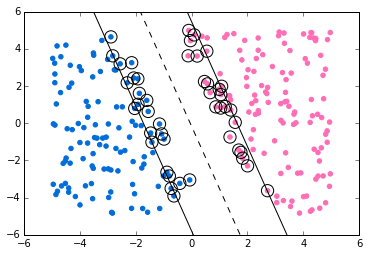

In [57]:
svct = SVC(C=0.01,kernel='linear')
svct.fit(X,labels)

plt.scatter(X[:,0],X[:,1],color=colors)
plot_svc_decision(svct,True)
svc_sp = svct.support_vectors_

plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')
plt.ylim(-6,6)
pass

slope of decision boundary: -3.35038341036
margin width: 3.40782152188


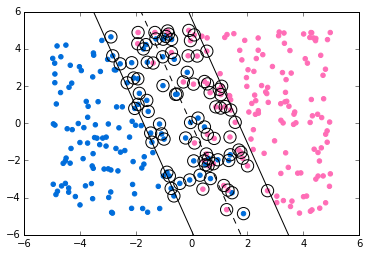

In [59]:
svct = SVC(C=0.01,kernel='linear')
svct.fit(Xi,labelsi)

plt.scatter(Xi[:,0],Xi[:,1],color=colors)
plot_svc_decision(svct,True)
svc_sp = svct.support_vectors_

plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')
plt.ylim(-6,6)
pass

##kernel trick

In [65]:
random_student()

'Robert Senseman'

In [66]:
random_student()

'Robert Senseman'

In [67]:
random_student()

'Neal Riordan'

In [ ]:
random_student()

remember our optimization and decision rule:

$\max\limits_{0 \le \alpha \le C, \sum\limits_i[\alpha_i y_i] = 0} \left (\sum_{i} \alpha_i - \left(\frac{1}{2}\right) \sum_{i,j} \left[\alpha_i \alpha_j  y_i  y_j  (\vec{x}_i \cdot \vec{x}_j) \right]\right )$  
$y_u = sign(\sum\limits_i [\alpha_i y_i (\vec{x}_i \cdot \vec{u})] + b)$

##kernels

kernel functions allow us to get the result of the dot product of vectors after being transformed to a higher dimensional space, without actually needing to know what that transformation is  

$\Phi(\vec{x})$ is some transformation from space of dimension d to space of dimenstion d+n  
then $K(\vec{x}_1,\vec{x}_2) = \langle\Phi(\vec{x}_1),\Phi(\vec{x}_2)\rangle$

since our decision rule and optimization only depend on dot products between our input data we can use kernels to transform our data to higher dimensions, without having to explicitly compute the transformed data

There are many kernels to potentially use, but some of the most common
are:  
  
linear:  
$K(\vec{x}_i,\vec{x}_j) = \vec{x}_i \cdot \vec{x}_j$  
  
polynomial (of degree d):  
$K(\vec{x}_i,\vec{x}_j) = (1 + \vec{x}_i \cdot \vec{x}_j)^d$  
  
radial basis function (gaussian):  
$K(\vec{x}_i,\vec{x}_j) = \exp(\gamma * ||\vec{x}_i - \vec{x}_j||^2)$

![](http://rvlasveld.github.io/images/oc-svm/visualization.gif)

In [7]:
with open('rbf_data3.pkl','r') as f:
    x_rbf,y_rbf = pickle.load(f)
with open('rbf_labels3.pkl','r') as f:
     labels_rbf = pickle.load(f)
        
colors_rbf = [c1 if i == 1 else c2 for i in labels_rbf]
X_rbf = np.array([x_rbf,y_rbf]).T

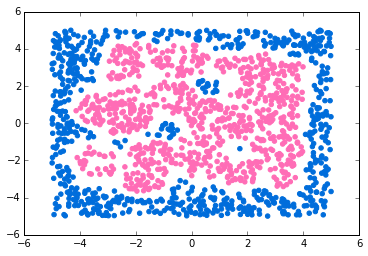

In [68]:
plt.scatter(X_rbf[:,0],X_rbf[:,1],color=colors_rbf)
pass

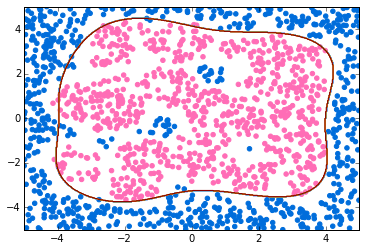

In [69]:
svm = SVC(C=1,gamma=0.1).fit(X_rbf,labels_rbf)
plot_boundary(svm,X_rbf)
plt.scatter(X_rbf[:,0],X_rbf[:,1],color=colors_rbf)

plt.xlim(-5,5)
plt.ylim(-5,5)
pass

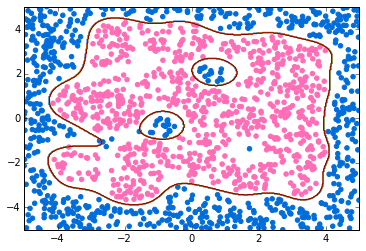

In [70]:
svm = SVC(C=1,gamma=1).fit(X_rbf,labels_rbf)
plot_boundary(svm,X_rbf)
plt.scatter(X_rbf[:,0],X_rbf[:,1],color=colors_rbf)

plt.xlim(-5,5)
plt.ylim(-5,5)
pass

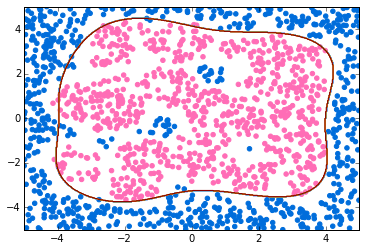

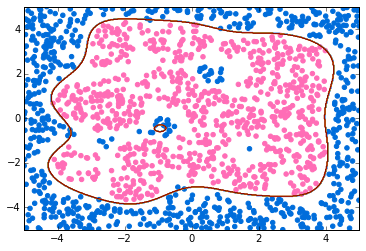

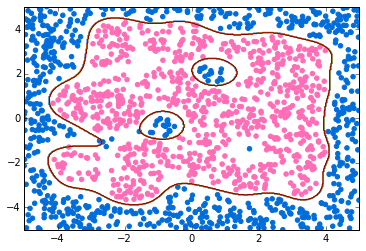

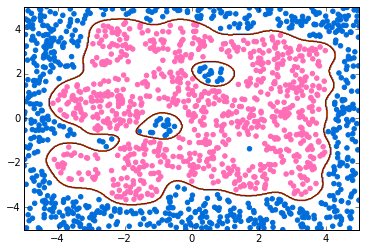

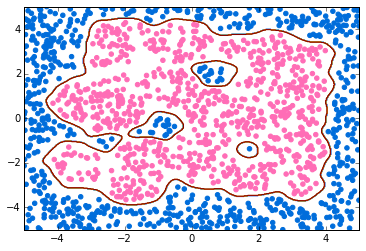

In [11]:
for g in [0.1,0.3,1,3,10]:
    plt.figure()
    svm = SVC(C=1,gamma=g).fit(X_rbf,labels_rbf)
    plot_boundary(svm,X_rbf)
    plt.scatter(X_rbf[:,0],X_rbf[:,1],color=colors_rbf)

    plt.xlim(-5,5)
    plt.ylim(-5,5)

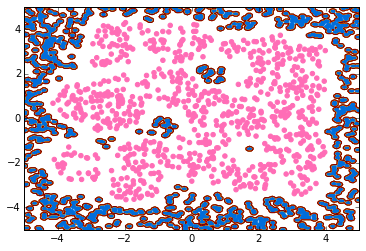

In [12]:
svm = SVC(C=1,gamma=250).fit(X_rbf,labels_rbf)
plot_boundary(svm,X_rbf)
plt.scatter(X_rbf[:,0],X_rbf[:,1],color=colors_rbf)

plt.xlim(-5,5)
plt.ylim(-5,5)
pass

In [72]:
random_student()

'Moses Marsh'

In [76]:
random_student()

'Anna Novakovska'

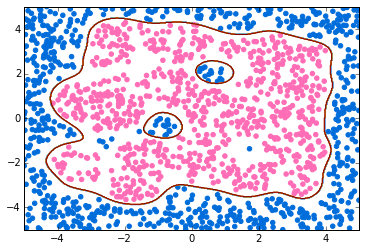

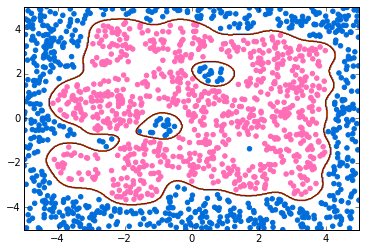

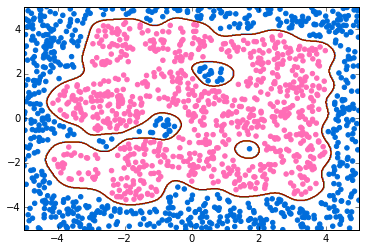

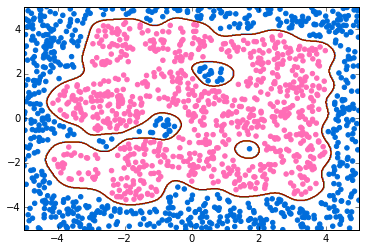

In [13]:
for c in [1E-1,1,10,100]:
    plt.figure()
    svm = SVC(C=c,gamma=3).fit(X_rbf,labels_rbf)
    plot_boundary(svm,X_rbf)
    plt.scatter(X_rbf[:,0],X_rbf[:,1],color=colors_rbf)

    plt.xlim(-5,5)
    plt.ylim(-5,5)

##grid search

![grid search](ryan_grid.png)

##multiclass

two main methods are used for multiclass svm:  
**one vs all:** train N models, assign points based on which model has largest value for $\vec{w} \cdot \vec{x} + b$    
**one vs one:** train $N * (N-1)\over{2}$ models, assign points based on majority vote of classes it has been assigned

##final notes/thoughts

- svm algorithm is ~$O(\text{rows}^2 * \text{cols})$ [i couldn't find clear numbers on the order, but regardless of specifics it is rather slow, and slower for large n]  
- however, solution space can end up being very sparse, which is useful for situations where p >> n  
- be careful using svm on very large data sets  
- the rbf kernel is very powerful, but also prone to overfitting, use with caution  
- in researching this lecture i discovered that people do all kinds of interesting/crazy things with svm  
    - single class svms can be used for anonomly/outlier detection (is implemented in sklearn)  
    - svm clustering is something that exists, but that i still don't really have a good handle on  
    - svm regression is done, also not entirely sure how that works  
    - you can include multiclass and cross validation scores in the dual space optimization algorithm, although i am not suggesting anyone actually try this  
    - i found some pretty extensive discussion of svm's used with genomic data, not sure if this is actually wide spread or there is just a vocal subset of users  
- it is not really possible to get probabilites out of svm models, which is annoying as people often want these  
- svm's have a natural fit with problems where there is a natural sense of the margin
    - for example, while i have not seen this done, it seems like svm's could work well for models where there are two clear classes, and then a zone of results that would like a human to check (for example fraud detection) could then tune your parameters to get a margin that matches what types of samples you would want human interaction with
   